## Análise exploratoria dos dados das Eleições para Prefeito em 2020 no Estado de SP
## Faremos um comparativo com as eleições de 2016 para entender as mudanças ocorridas em 4 anos

### 1. Importação dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.__version__

'1.1.3'

In [2]:
dataset_2016 = pd.read_csv("consulta_cand_2016_SP.csv", sep=";", encoding="Latin 1")

In [3]:
dataset_2020 = pd.read_csv("consulta_cand_2020_SP.csv", sep=";", encoding="Latin 1")

In [4]:
partidos = pd.read_csv("partidos2020.csv",sep=",")

In [5]:
dataset_2016.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,11/09/2020,19:58:59,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,...,ELEITO,N,S,1996352016,2864720166260175,2,DEFERIDO,2,DEFERIDO,SIM
1,11/09/2020,19:58:59,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,...,NÃO ELEITO,N,S,1879672016,1445220166260366,2,DEFERIDO,2,DEFERIDO,SIM
2,11/09/2020,19:58:59,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,...,SUPLENTE,N,N,1693452016,6436420166260001,2,DEFERIDO,2,DEFERIDO,SIM
3,11/09/2020,19:58:59,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,...,NÃO ELEITO,N,N,1642122016,1461420166260013,2,DEFERIDO,2,DEFERIDO,SIM
4,11/09/2020,19:58:59,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,...,NÃO ELEITO,N,S,1958392016,2499420166260118,2,DEFERIDO,2,DEFERIDO,SIM


In [6]:
dataset_2020.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,02/01/2021,18:18:02,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,6002663720206260152,2,DEFERIDO,2,DEFERIDO,SIM
1,02/01/2021,18:18:02,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6002045420206260230,2,DEFERIDO,2,DEFERIDO,SIM
2,02/01/2021,18:18:02,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,6002458820206260143,2,DEFERIDO,2,DEFERIDO,SIM
3,02/01/2021,18:18:02,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,N,-1,6002187320206260186,2,DEFERIDO,2,DEFERIDO,SIM
4,02/01/2021,18:18:02,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6003155020206260129,2,DEFERIDO,2,DEFERIDO,SIM


In [7]:
partidos

,Espectro,SG_PARTIDO_TR,SG_PARTIDO,NR_PARTIDO
0,centro,AVANTE,AVANTE,70
1,direita,DC,DC,27
2,direita,DEM,DEM,25
3,centro,MDB,MDB,15
4,direita,NOVO,NOVO,30
5,direita,PATRIOTA,PATRIOTA,51
6,esquerda,PCB,PCB,21
7,esquerda,PCDOB,PC do B,65
8,esquerda,PCO,PCO,29
9,esquerda,PDT,PDT,12


In [8]:
dataset_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86779 entries, 0 to 86778
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     86779 non-null  object 
 1   HH_GERACAO                     86779 non-null  object 
 2   ANO_ELEICAO                    86779 non-null  int64  
 3   CD_TIPO_ELEICAO                86779 non-null  int64  
 4   NM_TIPO_ELEICAO                86779 non-null  object 
 5   NR_TURNO                       86779 non-null  int64  
 6   CD_ELEICAO                     86779 non-null  int64  
 7   DS_ELEICAO                     86779 non-null  object 
 8   DT_ELEICAO                     86779 non-null  object 
 9   TP_ABRANGENCIA                 86779 non-null  object 
 10  SG_UF                          86779 non-null  object 
 11  SG_UE                          86779 non-null  int64  
 12  NM_UE                          86779 non-null 

### Pré processamento para fazer a limpeza dos dados antes das análises

In [5]:
nao_apto = dataset_2016[dataset_2016["DS_SITUACAO_CANDIDATURA"] != "APTO"].index

In [6]:
dataset_2016.drop(nao_apto,inplace=True)

In [7]:
nao_apto = dataset_2020[dataset_2020["DS_SITUACAO_CANDIDATURA"] != "APTO"].index

In [8]:
dataset_2020.drop(nao_apto,inplace=True)

In [9]:
dataset_2020[dataset_2020["DS_SITUACAO_CANDIDATURA"] != "APTO"]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA


### Separação entre os vereadores e prefeitos (neste estudo iremos utilizar somente dados de candidatos concorrendo em eleições ordinárias)

In [10]:
prefeitos_2016 = dataset_2016[dataset_2016["DS_CARGO"] == "PREFEITO"]
prefeitos_2020 = dataset_2020[dataset_2020["DS_CARGO"] == "PREFEITO"]

prefeitos_2016_Turno1 = prefeitos_2016[prefeitos_2016["NR_TURNO"] == 1 & (prefeitos_2016["CD_TIPO_ELEICAO"] == 2)]
prefeitos_2016_Turno2 = prefeitos_2016[prefeitos_2016["NR_TURNO"] == 2]
prefeitos_2020_Turno1 = prefeitos_2020[prefeitos_2020["NR_TURNO"] == 1 & (prefeitos_2020["CD_TIPO_ELEICAO"] == 2)]
prefeitos_2020_Turno2 = prefeitos_2020[prefeitos_2020["NR_TURNO"] == 2]

### Número de candidatos às prefeituras por partido

In [11]:
pref_partidos_2016 = prefeitos_2016_Turno1[["SG_PARTIDO", "ANO_ELEICAO"]].value_counts().reset_index()
pref_partidos_2020 = prefeitos_2020_Turno1[["SG_PARTIDO","ANO_ELEICAO"]].value_counts().reset_index()
pref_partidos_2016.columns = ["Partido", "Ano", "Quantidade"]
pref_partidos_2020.columns = ["Partido", "Ano", "Quantidade"]
pp = pref_partidos_2016.append(pref_partidos_2020, ignore_index=True)
pref_partidos = pp.astype({"Ano": "category"})
pref_partidos.sort_values(by=["Quantidade"], inplace=True, ascending=False)
pref_partidos

,Partido,Ano,Quantidade
33,PSDB,2020,386
0,PSDB,2016,336
1,PMDB,2016,198
34,PSD,2020,196
35,PTB,2020,179
...,...,...,...
61,PMB,2020,6
32,PT do B,2016,6
62,NOVO,2020,5
63,PCO,2020,3


[Text(0.5, 1.0, 'Comparativo de Número de Candidatos por Partido de Acordo com o Ano de Eleição')]

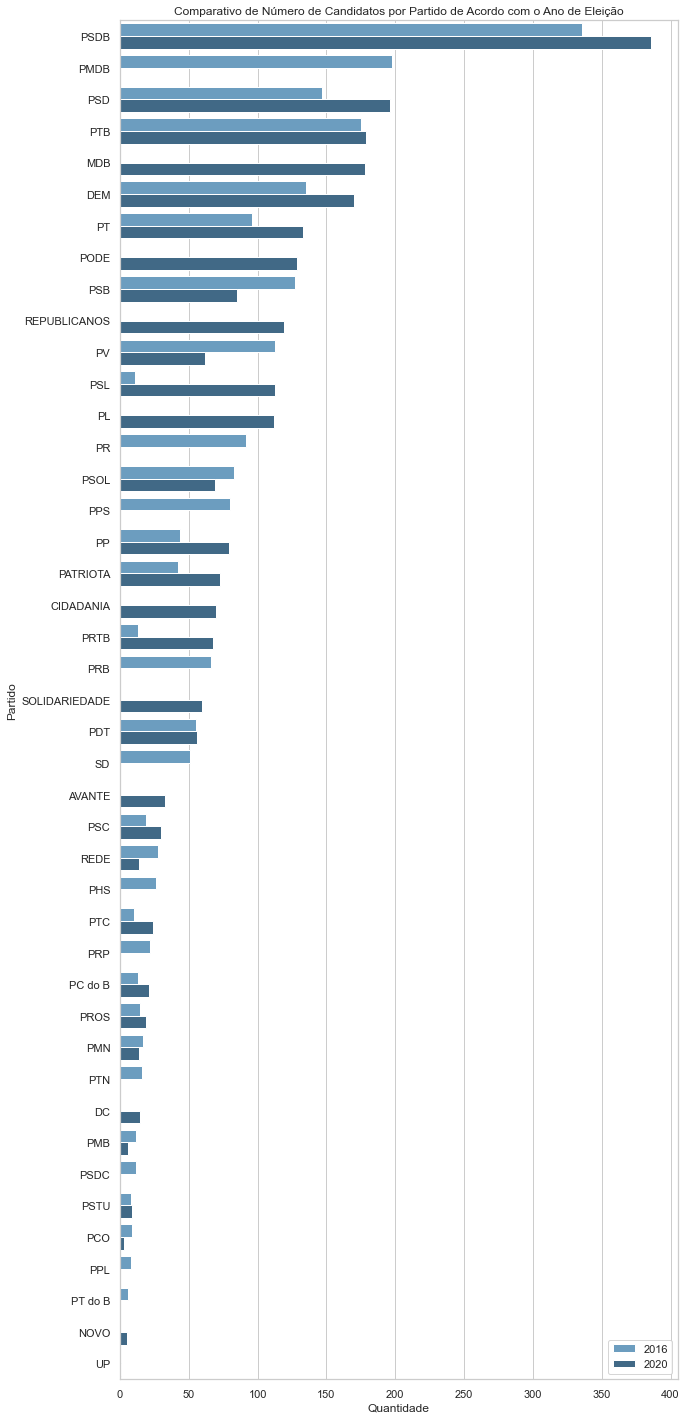

In [12]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 25))

sns.set_color_codes("muted")
sns.barplot(x="Quantidade", y="Partido", data=pref_partidos,  hue="Ano",palette="Blues_d", dodge=True)
ax.legend(loc="lower right")
ax.set(title="Comparativo de Número de Candidatos por Partido de Acordo com o Ano de Eleição")

### No gráfico acima podemos notar que houve um aumento considerável no número de candidatos nos principais partido como PT e PSDB. 

In [13]:
prefeitos_2016_Turno1_groupby_Partido = prefeitos_2016_Turno1.where(prefeitos_2016_Turno1["DS_SIT_TOT_TURNO"] == "ELEITO")\
.groupby(["SG_PARTIDO"]).size().reset_index()

prefeitos_2016_Turno1_groupby_Partido.columns = ["Partido", "Quantidade_2016"]

prefeitos_2016_Turno1_groupby_Partido.sort_values(by="Quantidade_2016", inplace=True, ascending=False)

prefeitos_2020_Turno1_groupby_Partido = prefeitos_2020_Turno1.where(prefeitos_2020_Turno1["DS_SIT_TOT_TURNO"] == "ELEITO")\
.groupby(["SG_PARTIDO"]).size().reset_index()

prefeitos_2020_Turno1_groupby_Partido.columns = ["Partido", "Quantidade_2020"]

prefeitos_2020_Turno1_groupby_Partido.sort_values(by="Quantidade_2020", inplace=True, ascending=False)

In [14]:
df = prefeitos_2016_Turno1_groupby_Partido.merge(prefeitos_2020_Turno1_groupby_Partido, how="outer", on="Partido")
df.fillna(0, inplace=True)
prefeitos_Turno1 = df.astype({"Quantidade_2016": "int64", "Quantidade_2020": "int64"})
prefeitos_Turno1
#df = prefeitos_2016_Turno1_groupby_Partido.append(prefeitos_2020_Turno1_groupby_Partido, ignore_index=True)
#prefeitos_Turno1 = df.astype({"Ano": "category"})
#prefeitos_Turno1.sort_values(by="Quantidade", inplace=True, ascending=False)
##prefeitos_Turno1.set_index(["Partido", "Ano"], inplace=True)

,Partido,Quantidade_2016,Quantidade_2020
0,PSDB,163,169
1,PMDB,82,0
2,PTB,59,51
3,PSD,59,62
4,DEM,47,68
5,PSB,38,15
6,PPS,33,0
7,PV,31,16
8,PR,29,0
9,PDT,13,5


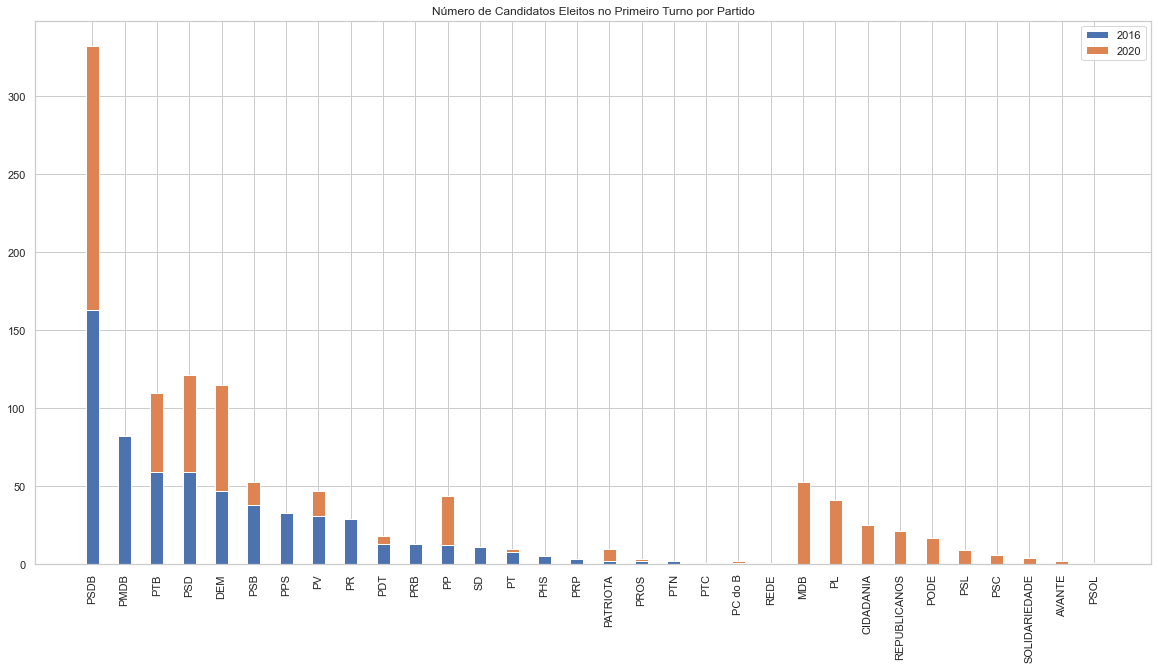

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
width = 0.40

ax.bar(data=prefeitos_Turno1, x="Partido", height="Quantidade_2016", width=width, label="2016")
ax.bar(data=prefeitos_Turno1, x="Partido", height="Quantidade_2020", bottom="Quantidade_2016", width=width, label="2020")

plt.xticks(rotation="vertical")

ax.set_title("Número de Candidatos Eleitos no Primeiro Turno por Partido")
ax.legend()

### O gráfico acima nos demonstra que ainda existe uma hegemonia de alguns partidos considerados de 'Centro', como o PSDB e um avanço em partidos de 'Direita' (segundo a atual classificação do espectro político brasileiro) como DEM, PSD e PP. Ao mesmo tempo, houve uma redução considerável de candidatos eleitos por partidos de 'Esquerda' como PT e PV

In [20]:
partidos

,Espectro,SG_PARTIDO_TR,SG_PARTIDO,NR_PARTIDO
0,centro,AVANTE,AVANTE,70
1,direita,DC,DC,27
2,direita,DEM,DEM,25
3,centro,MDB,MDB,15
4,direita,NOVO,NOVO,30
5,direita,PATRIOTA,PATRIOTA,51
6,esquerda,PCB,PCB,21
7,esquerda,PCDOB,PC do B,65
8,esquerda,PCO,PCO,29
9,esquerda,PDT,PDT,12


In [16]:
prefeitos_2016_Turno2_groupby_Partido = prefeitos_2016_Turno2.where(prefeitos_2016_Turno2["DS_SIT_TOT_TURNO"] == "ELEITO")\
.groupby(["SG_PARTIDO"]).size().reset_index()

prefeitos_2016_Turno2_groupby_Partido.columns = ["Partido", "Quantidade_2016"]

prefeitos_2016_Turno2_groupby_Partido.sort_values(by="Quantidade_2016", inplace=True, ascending=False)

prefeitos_2020_Turno2_groupby_Partido = prefeitos_2020_Turno2.where(prefeitos_2020_Turno2["DS_SIT_TOT_TURNO"] == "ELEITO")\
.groupby(["SG_PARTIDO"]).size().reset_index()

prefeitos_2020_Turno2_groupby_Partido.columns = ["Partido", "Quantidade_2020"]

prefeitos_2020_Turno2_groupby_Partido.sort_values(by="Quantidade_2020", inplace=True, ascending=False)

In [17]:
df = prefeitos_2016_Turno2_groupby_Partido.merge(prefeitos_2020_Turno2_groupby_Partido, how="outer", on="Partido")
df.fillna(0, inplace=True)
prefeitos_Turno2 = df.astype({"Quantidade_2016": "int64", "Quantidade_2020": "int64"})
prefeitos_Turno2
#df = prefeitos_2016_Turno1_groupby_Partido.append(prefeitos_2020_Turno1_groupby_Partido, ignore_index=True)
#prefeitos_Turno1 = df.astype({"Ano": "category"})
#prefeitos_Turno1.sort_values(by="Quantidade", inplace=True, ascending=False)
##prefeitos_Turno1.set_index(["Partido", "Ano"], inplace=True)

,Partido,Quantidade_2016,Quantidade_2020
0,PSDB,4,3
1,PSB,3,0
2,DEM,2,1
3,PR,1,0
4,PSD,1,2
5,PTN,1,0
6,PV,1,0
7,PODE,0,3
8,MDB,0,2
9,PT,0,2


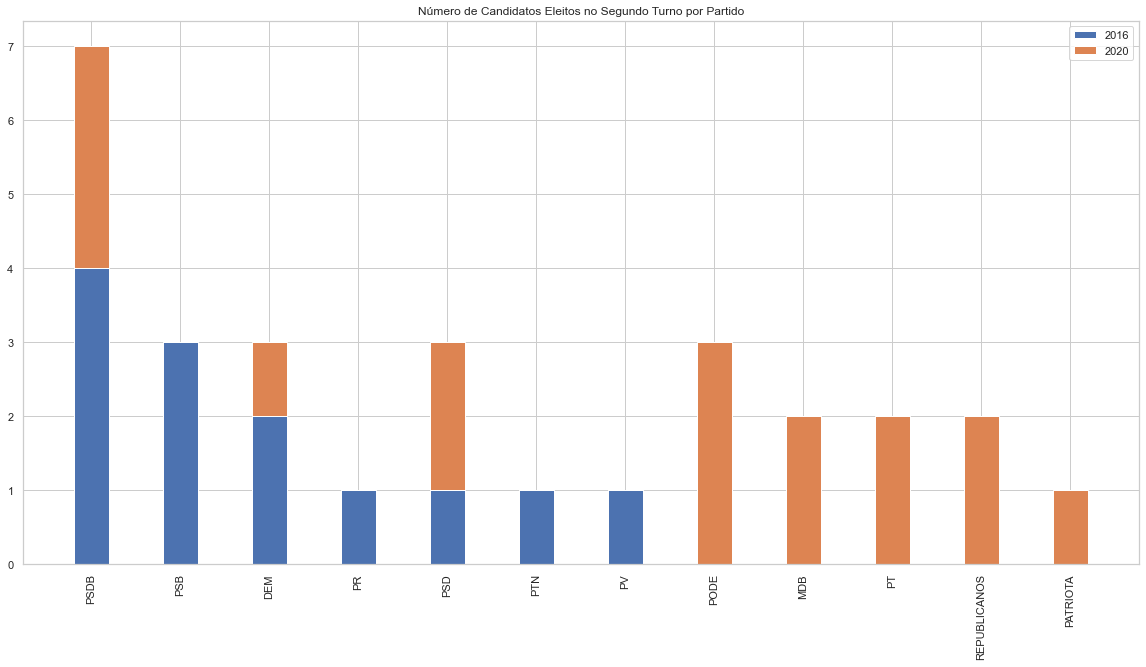

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
width = 0.40

ax.bar(data=prefeitos_Turno2, x="Partido", height="Quantidade_2016", width=width, label="2016")
ax.bar(data=prefeitos_Turno2, x="Partido", height="Quantidade_2020", bottom="Quantidade_2016", width=width, label="2020")

plt.xticks(rotation="vertical")

ax.set_title("Número de Candidatos Eleitos no Segundo Turno por Partido")
ax.legend()

### As análises seguintes serão relacionadas ao grau de instrução e faixa etária dos candidatos às prefeituras do Estado de São Paulo

In [18]:
def criaFaixaEtaria(idade):
    if idade < 17:
        return 'Menor que 17 anos'
    if 17 <= idade <= 20:
        return '17 a 20 anos'
    if 21 <= idade <= 30:
        return '21 a 30 anos'
    if 31 <= idade <= 40:
        return '31 a 40 anos'
    if 41 <= idade <= 50:
        return '41 a 50 anos'
    if 51 <= idade <= 60:
        return '51 a 60 anos'
    if 61 <= idade <= 70:
        return '61 a 70 anos'
    if 71 <= idade <= 80:
        return '71 a 80 anos'
    if 81 <= idade <= 90:
        return '81 a 90 anos'
    if idade > 90:
        return 'Maior que 90 anos'

In [19]:
prefeitos_2016.loc[:, "Faixa_Etaria"] = prefeitos_2016.loc[:,"NR_IDADE_DATA_POSSE"].apply(criaFaixaEtaria)
prefeitos_2020.loc[:, "Faixa_Etaria"] = prefeitos_2020.loc[:,"NR_IDADE_DATA_POSSE"].apply(criaFaixaEtaria)


c:\python38\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\python38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [30]:
prefeitos_2016[["Faixa_Etaria", "DS_GRAU_INSTRUCAO"]].groupby(["Faixa_Etaria", "DS_GRAU_INSTRUCAO"]).size().unstack(fill_value=0)

DS_GRAU_INSTRUCAO,SUPERIOR INCOMPLETO,ENSINO MÉDIO COMPLETO,SUPERIOR COMPLETO,ENSINO FUNDAMENTAL COMPLETO,ENSINO FUNDAMENTAL INCOMPLETO,ENSINO MÉDIO INCOMPLETO,LÊ E ESCREVE
Faixa_Etaria,,,,,,,
17 a 20 anos,1,0,0,0,0,0,0
21 a 30 anos,13,8,43,0,0,0,0
31 a 40 anos,21,72,289,3,4,5,2
41 a 50 anos,50,157,386,29,21,10,1
51 a 60 anos,38,158,403,37,28,20,1
61 a 70 anos,16,50,204,22,25,2,2
71 a 80 anos,3,9,27,6,15,2,0
81 a 90 anos,1,1,4,1,0,0,0


### Na tabela acima podemos verificar a relação entre faixa etária e grau de instrução. Podemos concluir que, em sua maioria, os candidatos se encontram entre 31 e 70 anos e possuem curso superior completo

In [25]:
print(f"A média de idade dos canditados é de: {prefeitos_2016['NR_IDADE_DATA_POSSE'].mean()} anos de idade")

A média de idade dos canditados é de: 50.16849315068493 anos de idade


<AxesSubplot:>

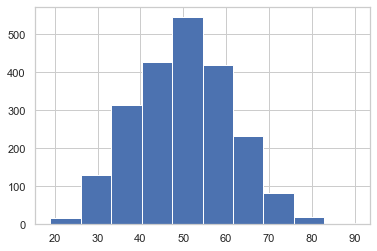

In [29]:
prefeitos_2016['NR_IDADE_DATA_POSSE'].hist()

In [52]:
df = prefeitos_2016[["Faixa_Etaria", "DS_GRAU_INSTRUCAO"]].groupby(["Faixa_Etaria", "DS_GRAU_INSTRUCAO"]).size().reset_index()
df.rename(columns={df.columns[2]:"Quantidade"}, inplace=True)
df

,Faixa_Etaria,DS_GRAU_INSTRUCAO,Quantidade
0,17 a 20 anos,SUPERIOR INCOMPLETO,1
1,21 a 30 anos,ENSINO MÉDIO COMPLETO,8
2,21 a 30 anos,SUPERIOR COMPLETO,43
3,21 a 30 anos,SUPERIOR INCOMPLETO,13
4,31 a 40 anos,ENSINO FUNDAMENTAL COMPLETO,3
5,31 a 40 anos,ENSINO FUNDAMENTAL INCOMPLETO,4
6,31 a 40 anos,ENSINO MÉDIO COMPLETO,72
7,31 a 40 anos,ENSINO MÉDIO INCOMPLETO,5
8,31 a 40 anos,LÊ E ESCREVE,2
9,31 a 40 anos,SUPERIOR COMPLETO,289


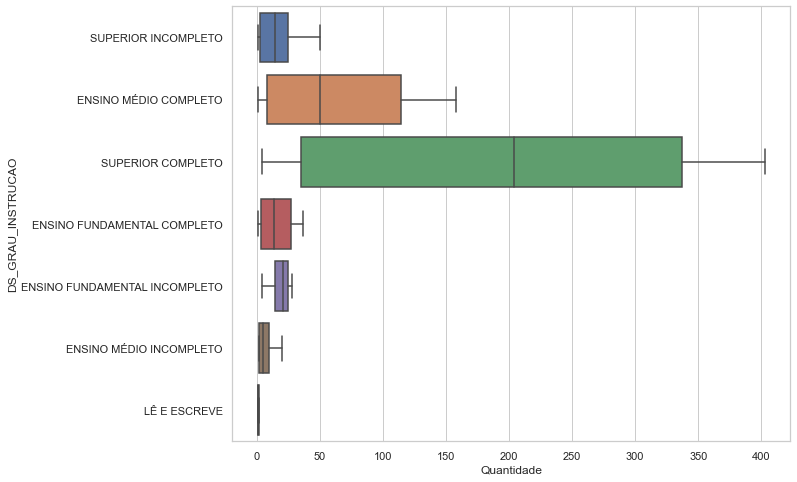

In [55]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.boxplot(x="Quantidade",y="DS_GRAU_INSTRUCAO", data=df)

In [56]:
df = prefeitos_2016[["Faixa_Etaria", "DS_GRAU_INSTRUCAO"]].groupby(["Faixa_Etaria", "DS_GRAU_INSTRUCAO"]).size().reset_index()
df.rename(columns={df.columns[2]: "Quantidade"}, inplace=True)
df

,Faixa_Etaria,DS_GRAU_INSTRUCAO,Quantidade
0,17 a 20 anos,SUPERIOR INCOMPLETO,1
1,21 a 30 anos,ENSINO MÉDIO COMPLETO,8
2,21 a 30 anos,SUPERIOR COMPLETO,43
3,21 a 30 anos,SUPERIOR INCOMPLETO,13
4,31 a 40 anos,ENSINO FUNDAMENTAL COMPLETO,3
5,31 a 40 anos,ENSINO FUNDAMENTAL INCOMPLETO,4
6,31 a 40 anos,ENSINO MÉDIO COMPLETO,72
7,31 a 40 anos,ENSINO MÉDIO INCOMPLETO,5
8,31 a 40 anos,LÊ E ESCREVE,2
9,31 a 40 anos,SUPERIOR COMPLETO,289


<AxesSubplot:>

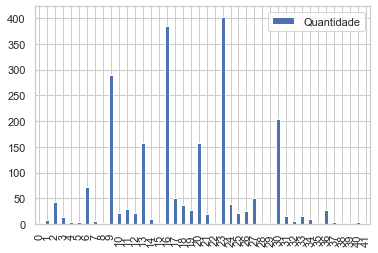

In [62]:
df.plot.bar()
#sns.catplot(x="DS_GRAU_INSTRUCAO", y="Quantidade", hue="Faixa_Etaria", kind="bar", data=df)

In [26]:
#prefeitos_cidade_2016_turno1 = prefeitos_2016_Turno1.where(prefeitos_2016_Turno1["DS_SIT_TOT_TURNO"] == "ELEITO").groupby(["SG_PARTIDO","NM_UE"]).size().reset_index()
#prefeitos_cidade_2016_turno2 = prefeitos_2016_Turno2.where(prefeitos_2016_Turno2["DS_SIT_TOT_TURNO"] == "ELEITO").groupby(["SG_PARTIDO","NM_UE"]).size().reset_index()


In [27]:
#prefeitos_2016[["FAIXA_ETARIA","NR_IDADE_DATA_POSSE"]]

In [28]:
#prefeito_faixa_etaria_2016 = prefeitos_2016.groupby("FAIXA_ETARIA").size().reset_index()
#prefeito_faixa_etaria_2016

In [29]:
#prefeito_grau_instrucao_2016 = prefeitos_2016.groupby("DS_GRAU_INSTRUCAO").size().reset_index()
#prefeito_grau_instrucao_2016

In [30]:
#prefeito_faixa_grau_2016 = prefeitos_2016.groupby(["FAIXA_ETARIA","DS_GRAU_INSTRUCAO"]).size().reset_index()
#prefeito_faixa_grau_2016.rename(columns = {prefeito_faixa_grau_2016.columns[2]:"Quantidade", "DS_GRAU_INSTRUCAO": "Grau_Instrucao"}, inplace=True)

In [31]:
#prefeito_faixa_grau_2016.plot.scatter(x="FAIXA_ETARIA", y="Grau_Instrucao", c= "Quantidade")

In [42]:
df_pivot.columns[2]

0